### Tarea M43 - Bryan Alberto Coronado García

___

#### **Importación de un modelo con datos de ventas de casas (housing.csv)**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:/Users/thehe/OneDrive/Escritorio/EBAC/Tareas/6. Machine Learning (M41 - )/M43 (Regresion)')
print(os.getcwd())

df = pd.read_csv('Housing.csv', sep=',')

C:\Users\thehe\OneDrive\Escritorio\EBAC\Tareas\6. Machine Learning (M41 - )\M43 (Regresion)


#### **Exploratory Data Analysis (EDA)** *○Feature engineering: estandarización, eliminación, nuevas columnas.*

In [2]:
print(df.shape) # forma del dataframe
df.sample(5) # ejemplar del dataframe

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
400,3500000,3512,2,1,1,yes,no,no,no,no,1,yes,unfurnished
234,4620000,3880,3,2,2,yes,no,yes,no,no,2,no,semi-furnished
223,4760000,6321,3,1,2,yes,no,yes,no,yes,1,no,furnished
236,4620000,2870,2,1,2,yes,yes,yes,no,no,0,yes,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


In [3]:
# Validación de datos nulos en el dataframe

print(f'Existencia de {df.isnull().sum().sum()} valores nulos en el dataset')
print('Sin necesidad de imputación de datos')

Existencia de 0 valores nulos en el dataset
Sin necesidad de imputación de datos


In [4]:
# Transformación de variables categóricas a tipo 'category'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [5]:
print('Sin presencia de valores únicos:')
df.nunique()

Sin presencia de valores únicos:


price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Formato de visualización de números flotantes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.00,4766729.25,1870439.62,1750000.00,3430000.00,4340000.00,5740000.00,13300000.00
area,545.00,5150.54,2170.14,1650.00,3600.00,4600.00,6360.00,16200.00
bedrooms,545.00,2.97,0.74,1.00,2.00,3.00,3.00,6.00
bathrooms,545.00,1.29,0.50,1.00,1.00,1.00,2.00,4.00
stories,545.00,1.81,0.87,1.00,1.00,2.00,2.00,4.00
parking,545.00,0.69,0.86,0.00,0.00,0.00,1.00,3.00


#### **Generación de variables dummy en el set de datos**

In [ ]:
# Transformación de variables categóricas a variables numéricas (dummies).
# Uso del método mostrado en clase.

df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0}, regex=True)
df['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0}, regex=True)
df['basement'] = df['basement'].replace({'yes': 1, 'no': 0}, regex=True)
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 1, 'no': 0}, regex=True)
df['airconditioning'] = df['airconditioning'].replace({'yes': 1, 'no': 0}, regex=True)
df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0}, regex=True)
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3}, regex=True)
print('Transformación de variables categóricas a numéricas realizada')

Transformación de variables categóricas a numéricas realizada


In [8]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
267,4403000,4920,3,1,2,1,0,0,0,0,1,0,2
53,7350000,5150,3,2,4,1,0,0,0,1,2,0,2
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,2
337,3920000,2145,4,2,1,1,0,1,0,0,0,1,3
349,3780000,4820,3,1,2,1,0,0,0,0,0,0,2


In [9]:
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


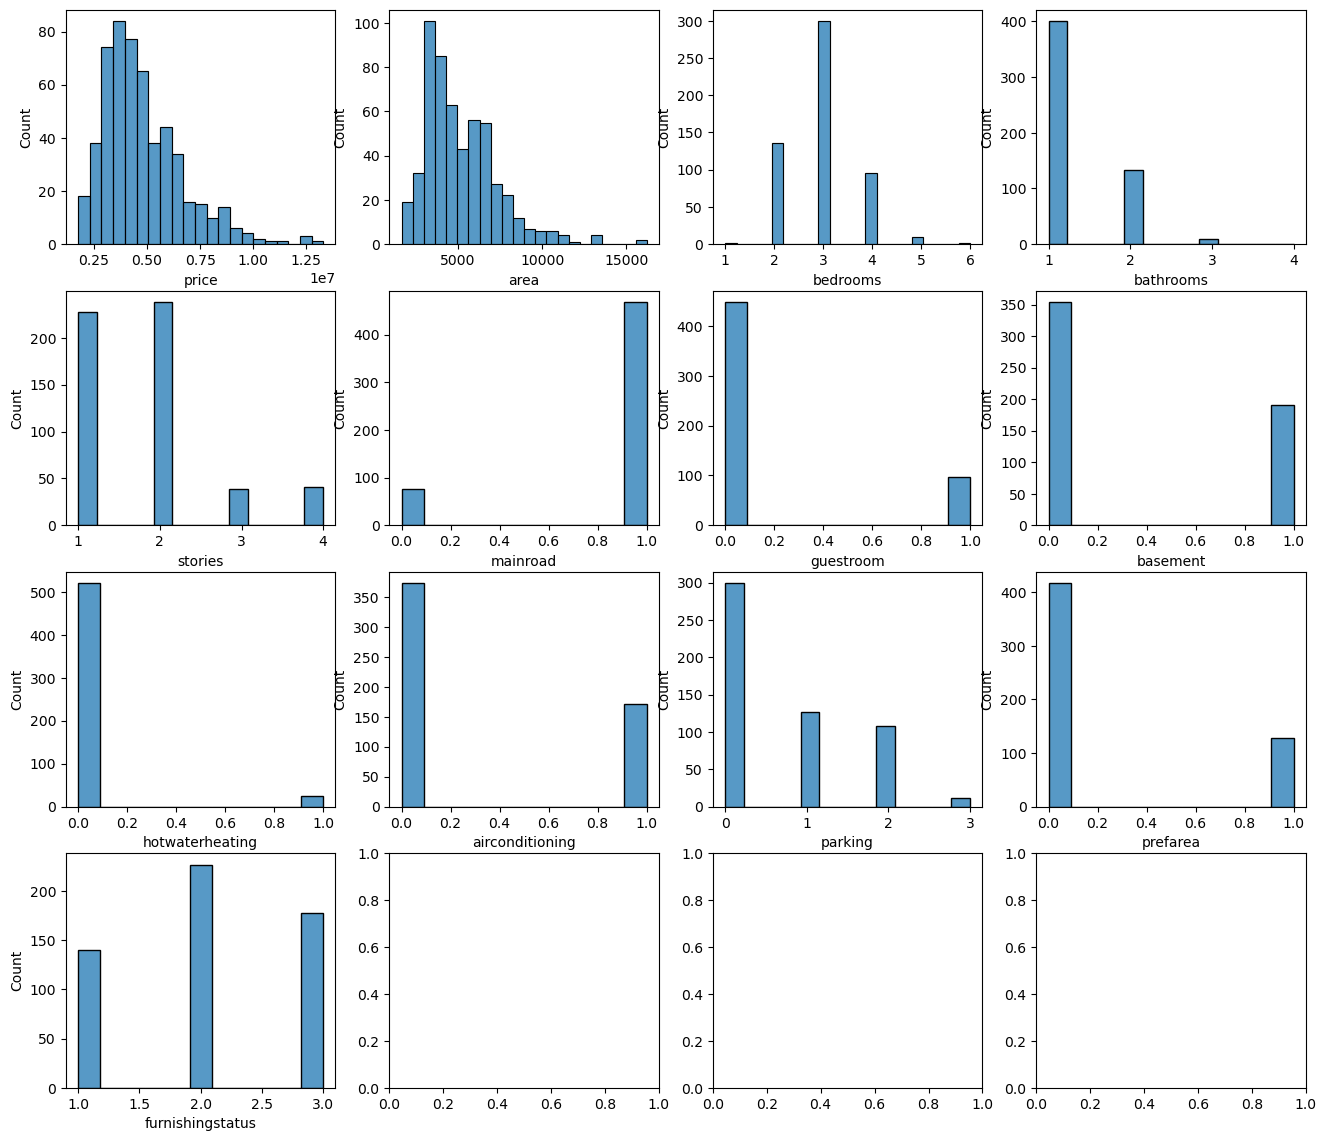

In [ ]:
# Graficación de las variables.
fig, axes = plt.subplots(4,4, figsize= (16,14))
for i, column in enumerate(df.select_dtypes(include=['int64']).columns):
    sns.histplot(df[column], ax=axes[i//4, i%4, ], kde=False)

#### **Entrenamiento, evaluación y predicción de los resultados del modelo.**
 ○Aplicación de modelo de regresión lineal a la variable Price.

In [28]:
# Aplicación de la regresión lineal a la variable 'price'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

x = df.drop(['price'], axis=1)  # Variables independientes
y = df['price']

In [20]:
# Entrenamiento y validación del modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print(f'{(len(x_train)/len(df.index) * 100):.2f}% de los datos se han utilizado para el entrenamiento.')
print(f'{(len(x_test)/len(df.index) * 100):.2f}% de los datos se han utilizado para la validación.')

69.91% de los datos se han utilizado para el entrenamiento.
30.09% de los datos se han utilizado para la validación.


In [21]:
# Entrenamiento del modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

# Coeficiente de regresión de entrenamiento
regression_model.score(x_train, y_train)

0.6799674103626108

#### **Análisis de Sensibilidad e importancia de variables.**

In [27]:
# Predicción sobre el set de prueba
y_pred = regression_model.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds.head()

,Actual,Predicted
62,7070000,6291567.11
247,4550000,6390833.35
142,5600000,6529768.58
107,6125000,5564502.05
483,2940000,4230599.25


In [31]:
y_pred = regression_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 855894.77
Mean Squared Error (MSE): 1375329793553.13
Root Mean Squared Error (RMSE): 1172744.56


In [33]:
for idx, col_name in enumerate(x_train.columns):
    print(f'Coef {col_name} = {regression_model.coef_[idx]:.2f}')

Coef area = 246.35
Coef bedrooms = 47198.86
Coef bathrooms = 1020173.24
Coef stories = 525778.96
Coef mainroad = 476712.98
Coef guestroom = 275668.95
Coef basement = 557956.27
Coef hotwaterheating = 822714.56
Coef airconditioning = 608777.01
Coef parking = 274736.45
Coef prefarea = 500668.03
Coef furnishingstatus = -202462.67


#### **Visualización de los resultados del modelo de regresión.**

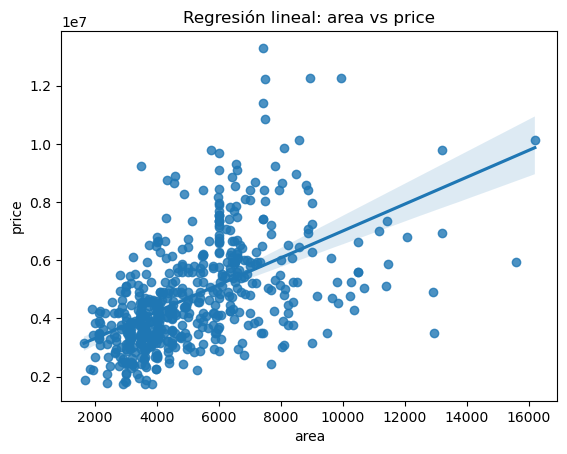

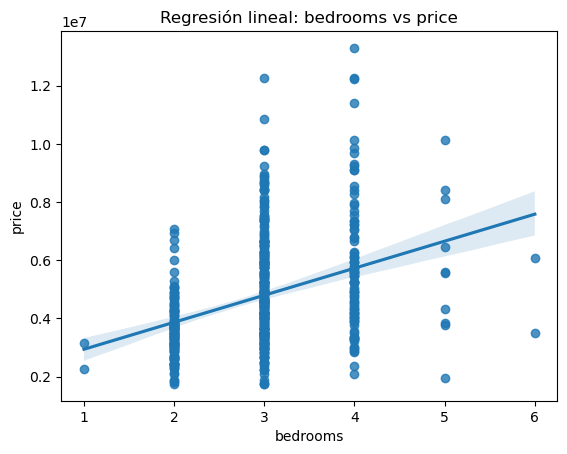

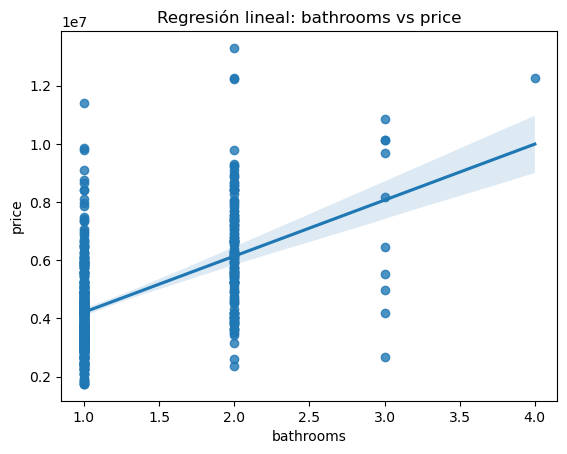

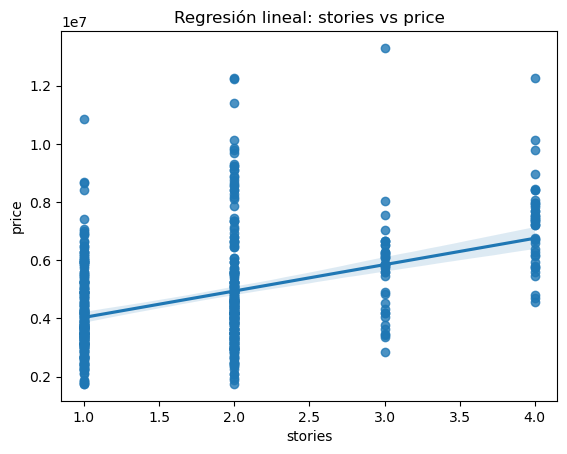

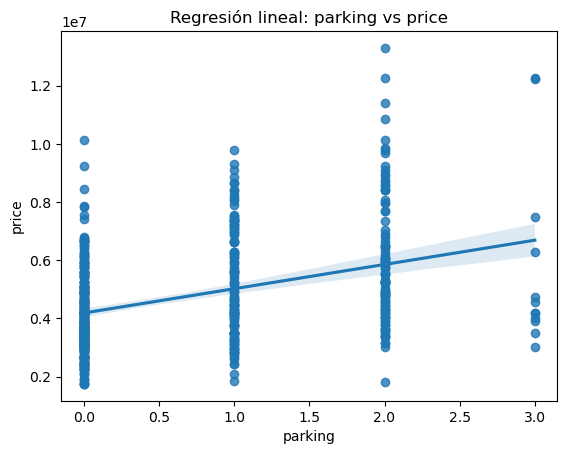

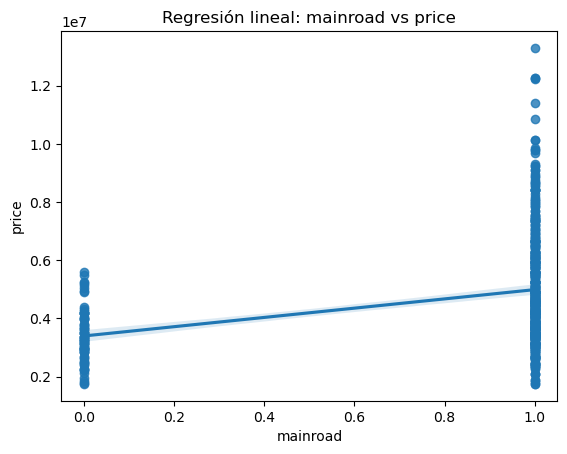

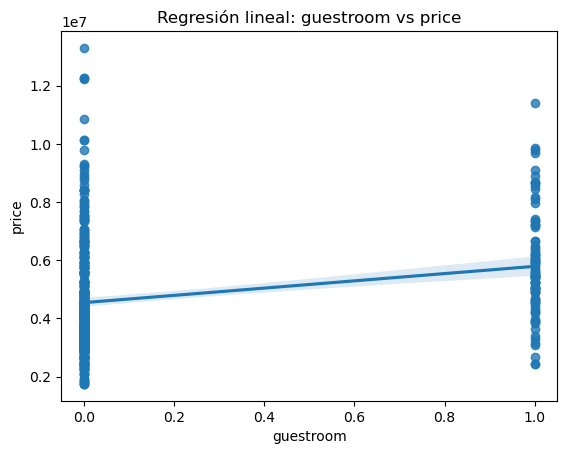

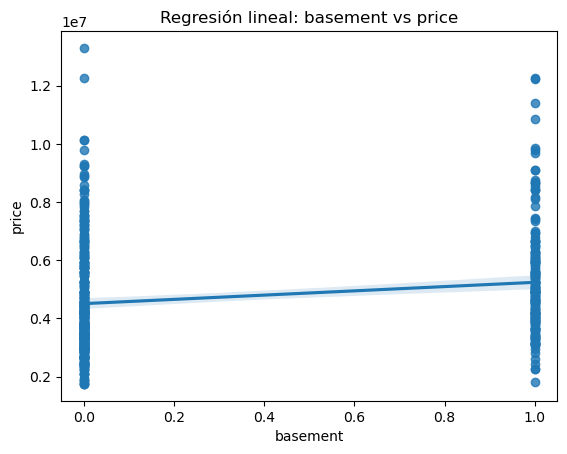

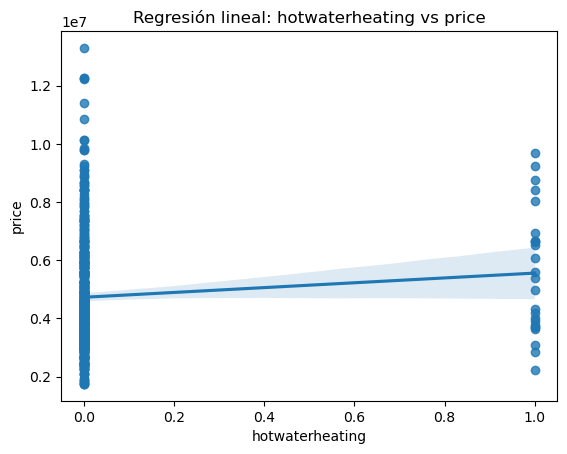

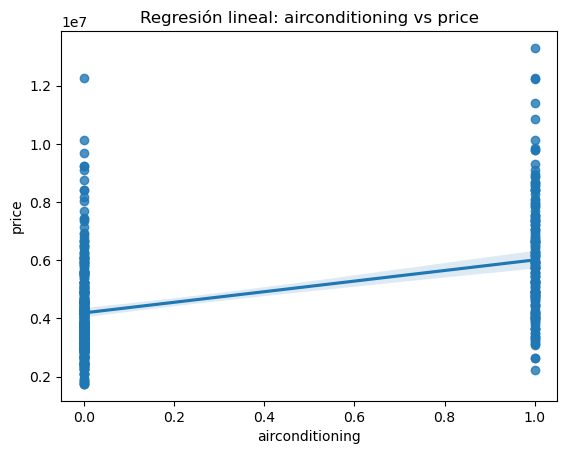

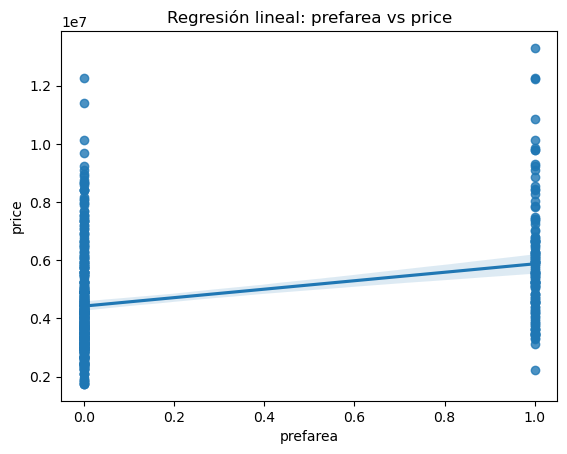

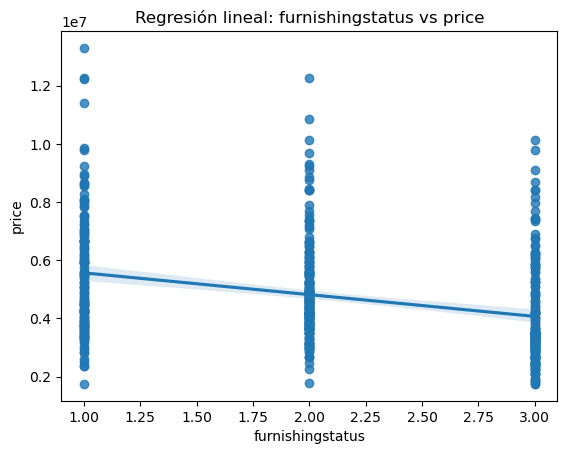

In [ ]:
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='price', data=df).set_title(f'Regresión lineal: {var} vs price')

# La mayoría de las variables muestran una relación linea positiva con el precio.